In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from sklearn.cross_validation import ShuffleSplit
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import calendar

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace import sarimax as sa
from statsmodels.stats import diagnostic as diag
import functions as fn
from scipy import signal
# Pretty display for notebooks
%matplotlib inline


/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
air_visit = pd.read_csv('air_visit_data.csv', parse_dates=['visit_date'],\
                 date_parser=dateparse)

In [3]:
datetimeparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
air_reserve = pd.read_csv('air_reserve.csv', parse_dates=\
                          ['visit_datetime', 'reserve_datetime'],\
                          date_parser=datetimeparse)

In [4]:
air_store = pd.read_csv('air_store_info.csv')
air_store['air_area_name'] = air_store['air_area_name'].str.replace('ō','o').str.replace('Ō','O')
# air_store[air_store['air_genre_name'] == 'Creative cuisine']
# air_store['area'] = air_store['area'].str.replace(u'ō','o').str.replace(u'Ō','O')

In [5]:
hpg_reserve = pd.read_csv('hpg_reserve.csv')
hpg_reserve['visit_datetime'] = pd.to_datetime(hpg_reserve['visit_datetime'])
hpg_reserve['reserve_datetime'] = pd.to_datetime(hpg_reserve['reserve_datetime'])
# hpg_reserve.dtypes

In [6]:
hpg_store = pd.read_csv('hpg_store_info.csv')

In [7]:
date_info = pd.read_csv('date_info.csv')
holiday_dates = date_info[date_info['holiday_flg'] == 1]['calendar_date']

### Analysing air_visit data

In [8]:
air_visit['air_store_id'].unique()
dfwithIndex = air_visit.set_index('visit_date', drop=False)
dfwithIndex.index.name = None

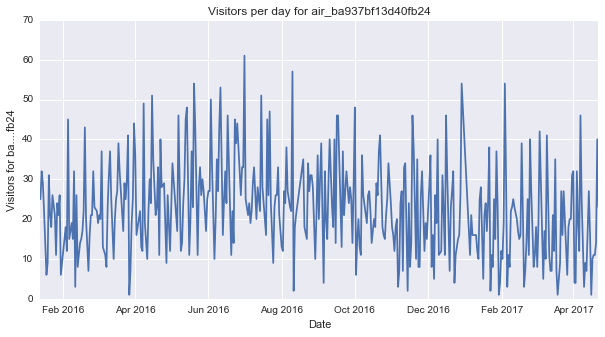

In [9]:
# print list(air_visits)
store = air_visit[air_visit.air_store_id=='air_ba937bf13d40fb24']
plt.figure(figsize=(10,5))
plt.plot(store.visit_date, store.visitors)
plt.ylabel('Visitors for ba....fb24')
plt.xlabel('Date')
plt.title('Visitors per day for air_ba937bf13d40fb24')
plt.show()

functions.py:29: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  df['day_of_week'] = df['day_of_week'].astype("category", categories=days, ordered=True)


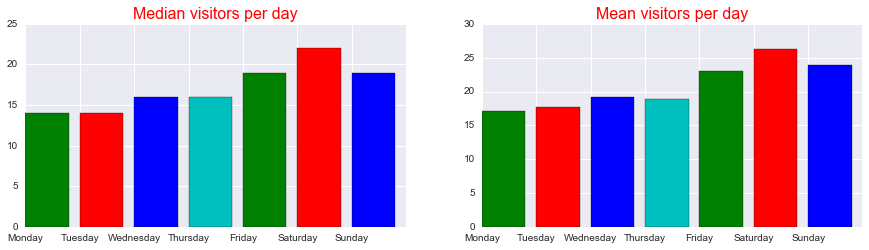

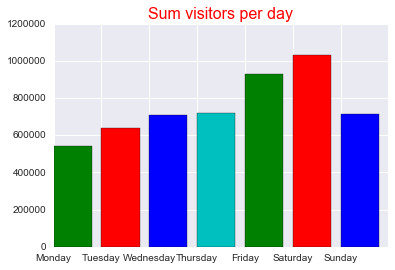

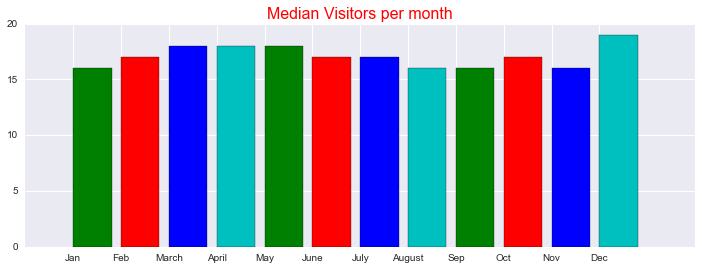

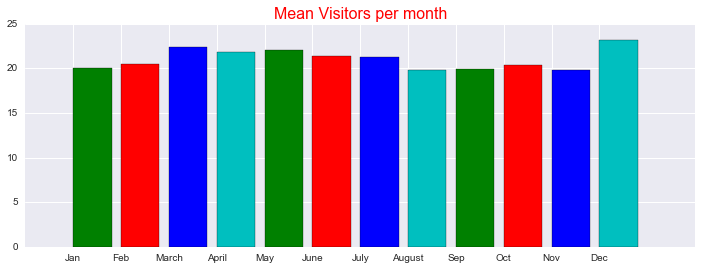

In [10]:
fn.stats_day(air_visit)
fn.stats_month(air_visit)

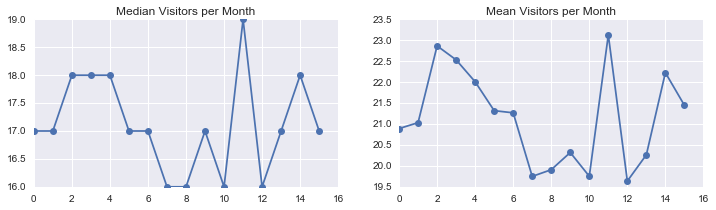

In [11]:
from datetime import datetime
air_visit['year'] = air_visit['visit_date'].dt.year
mdvstors_month = air_visit.groupby(['month', 'year'], as_index=False)['visitors'].median()
meanvstors_month = air_visit.groupby(['month', 'year'], as_index=False)['visitors'].mean()
mdvstors_month.sort_values('year', inplace=True)
mdvstors_month.reset_index(drop=True, inplace=True)
meanvstors_month.sort_values('year', inplace=True)
meanvstors_month.reset_index(drop=True, inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 3))
ax1.plot(mdvstors_month.index, mdvstors_month['visitors'], 'o-')
ax1.set_title('Median Visitors per Month')
ax2.plot(meanvstors_month.index, meanvstors_month['visitors'], 'o-')
ax2.set_title('Mean Visitors per Month')

(0, 150)

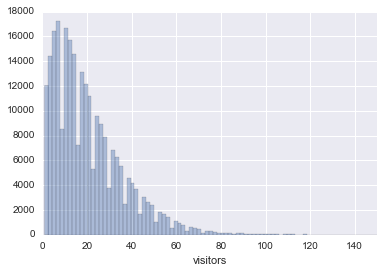

In [12]:
sns.distplot(air_visit['visitors'], bins= 500, kde=False)
plt.xlim(0,150)


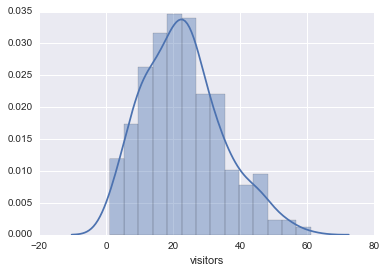

In [13]:
sns.distplot(air_visit[air_visit.air_store_id=='air_ba937bf13d40fb24']['visitors'])
# sns.distplot(df[df.air_store_id=='air_25e9888d30b386df']['visitors'], kde=False)
# sns.distplot(df[df.air_store_id=='air_8e4360a64dbd4c50']['visitors'], kde=False)
# sns.distplot(df[df.air_store_id=='air_7420042ff75f9aca']['visitors'], kde=False)

0.0117599964142
0.0167551040649


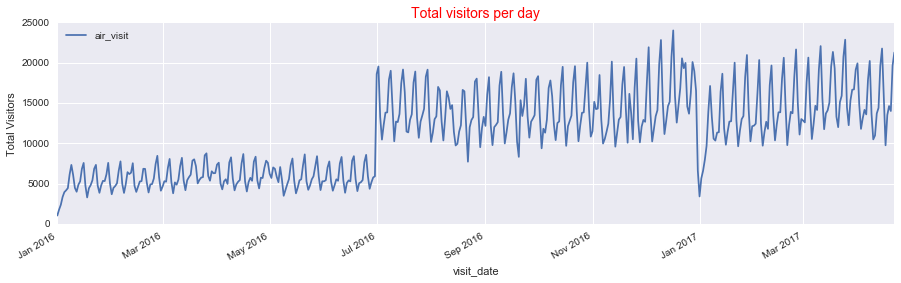

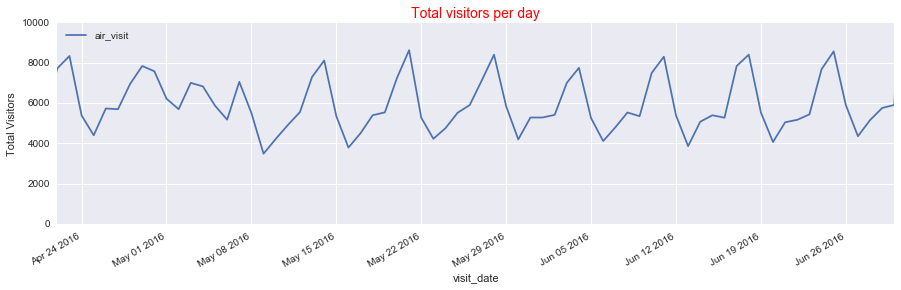

2016-01-01 00:00:00 2017-04-22 00:00:00


In [14]:
start = time()
Totalvisitors_day = air_visit.groupby('visit_date', as_index=False)\
                    ['visitors'].sum()
end = time()
print end - start

start = time()
df2 = dfwithIndex.groupby('visit_date', as_index=False).sum()
end = time()
print end - start

fn.totvstors_date(Totalvisitors_day, None, None)
fn.totvstors_date(Totalvisitors_day, ('2016-04-22', '2016-06-30'), (0, 10000))

print min(Totalvisitors_day.visit_date), max(Totalvisitors_day.visit_date)

#### Distribution of visits before and after July 1

/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: 'visit_date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: 'visit_date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: 'visit_date' is both a column name and an

[(0, 25000)]

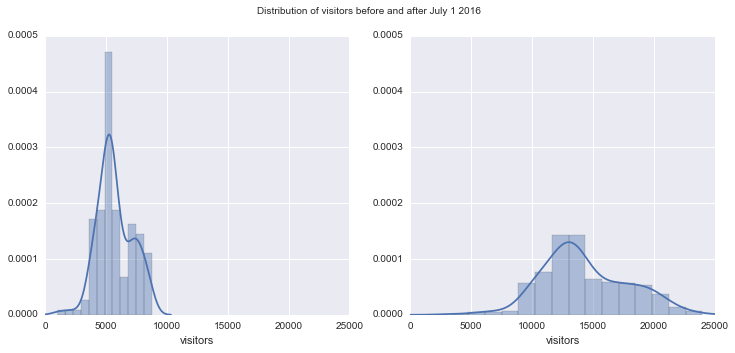

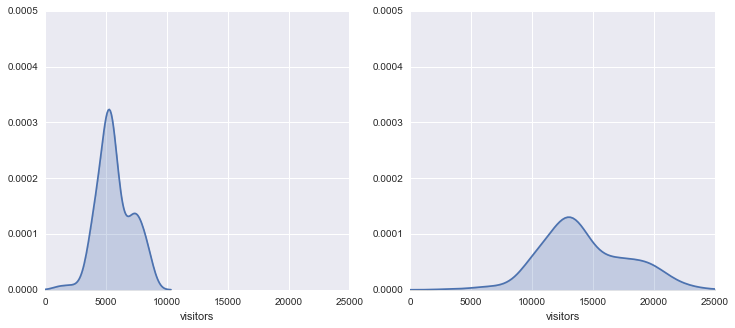

In [15]:
air_visit.set_index('visit_date', drop=False, inplace=True)
df = air_visit.ix['2016-01-01':'2016-06-30']
df1 = air_visit.ix['2016-06-30':]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
fig.suptitle('Distribution of visitors before and after July 1 2016')
sns.distplot(df.groupby('visit_date')['visitors'].sum(), ax=ax1)
ax1.set(xlim=(0, 25000))
sns.distplot(df1.groupby('visit_date')['visitors'].sum(), ax=ax2)
ax2.set(ylim=(0, .0005))
ax2.set(xlim=(0, 25000))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

sns.distplot(df.groupby('visit_date')['visitors'].sum(), ax=ax1, hist=False, \
             kde_kws={"shade": True})
ax1.set(xlim=(0, 25000))
ax1.set(ylim=(0, .0005))

sns.distplot(df1.groupby('visit_date')['visitors'].sum(), ax=ax2,hist=False, \
             kde_kws={"shade": True})
ax2.set(ylim=(0, .0005))
ax2.set(xlim=(0, 25000))

In [16]:
original_stores = df.air_store_id.unique()
additional_stores = set(df1.air_store_id.unique()).difference(set(df.air_store_id.unique()))
print len(df.air_store_id.unique())
print len(df1.air_store_id.unique())
min(air_visit['visit_date']), max(air_visit['visit_date'])
len(original_stores), len(additional_stores)

316
829


(316, 513)

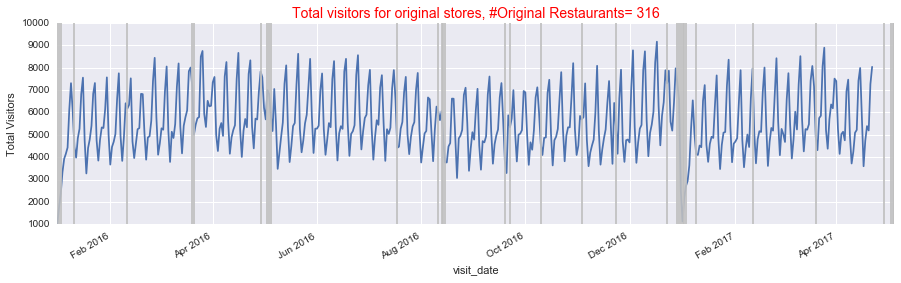

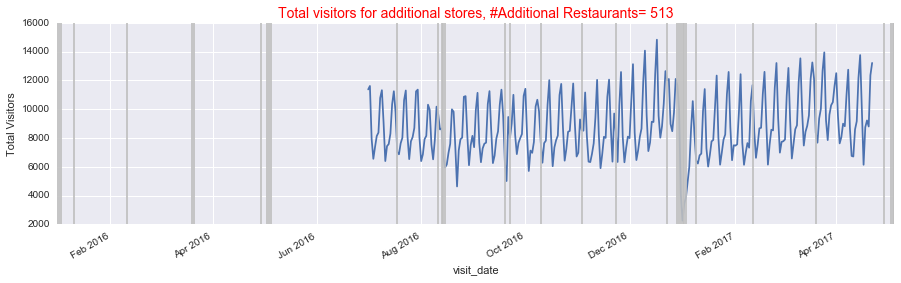

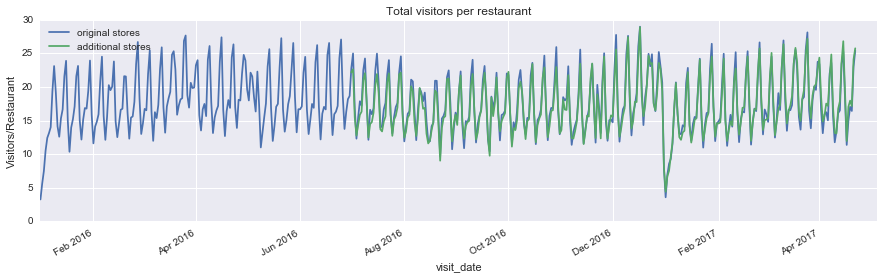

In [17]:
air_visit.reset_index(drop=True, inplace=True)
visit_orignl_stores = air_visit[air_visit['air_store_id'].isin(original_stores)]
visit_additional_stores = air_visit[air_visit['air_store_id'].isin(additional_stores)]

Totalvisitors_orgnal_stores = visit_orignl_stores.groupby('visit_date', as_index = False)['visitors'].sum()
Totalvisitors_add_stores = visit_additional_stores.groupby('visit_date', as_index = False)['visitors'].sum()
Totalvisitors_add_stores.to_pickle('Totalvisitors_add_stores.pickle')
fn.totvstors_date_hol(Totalvisitors_orgnal_stores, holiday_dates,  \
'Total visitors for original stores, #Original Restaurants= {}'.format(len(original_stores)))
fn.totvstors_date_hol(Totalvisitors_add_stores, holiday_dates,  \
'Total visitors for additional stores, #Additional Restaurants= {}'.format(len(additional_stores)))


fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(Totalvisitors_orgnal_stores.visit_date, Totalvisitors_orgnal_stores.visitors/float(len(original_stores)), \
        label = 'original stores')
ax.plot(Totalvisitors_add_stores.visit_date, Totalvisitors_add_stores.visitors/float(len(additional_stores)), \
        label = 'additional stores')
plt.title('Total visitors per restaurant')   
legend = ax.legend(loc = 'upper left', shadow = True)
plt.xlabel('visit_date')
plt.xlim('2016-01-01', '2017-05-05')
plt.ylabel('Visitors/Restaurant')
# plt.gca().xaxis.set_major_locator(months)
plt.gcf().autofmt_xdate(rotation=30)

plt.show()

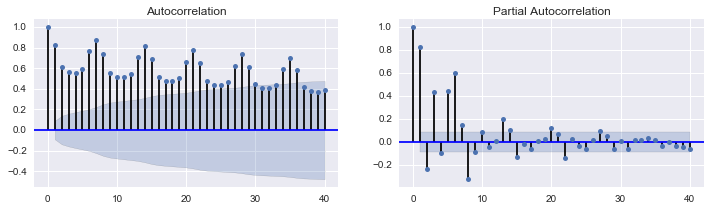

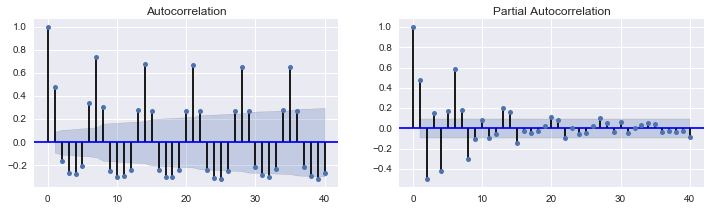

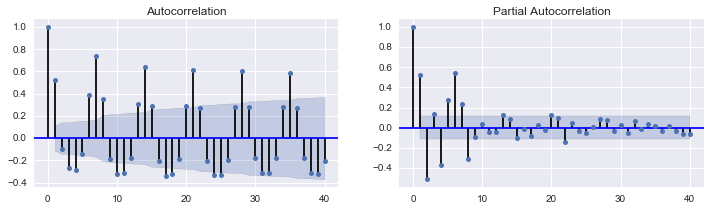

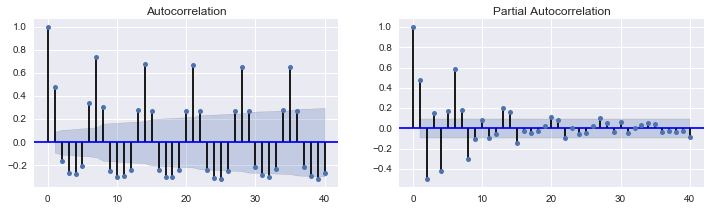

In [18]:
fn.ACF(Totalvisitors_day.visitors)
fn.ACF(Totalvisitors_orgnal_stores.visitors)
fn.ACF(Totalvisitors_add_stores.visitors)
fn.ACF(Totalvisitors_orgnal_stores.visitors/float(len(original_stores)))

#### Checking Stationarity & Augmented Dickey-Fuller test

In [19]:
fn.ADF(Totalvisitors_orgnal_stores['visitors'])
# Box(Totalvisitors_orgnal_stores['visitors'])

mean1=5668.677824, mean2=5533.581590
variance1=1886540.000809, variance2=2025653.185542
ADF Statistic: -4.121228
p-value: 0.000893
Critical Values:
	5%: -2.868
	1%: -3.445
	10%: -2.570


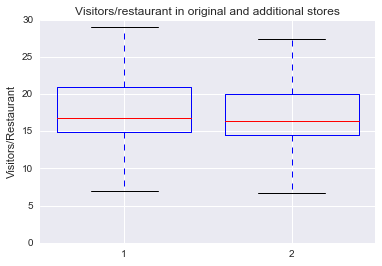

In [20]:
s1 = Totalvisitors_orgnal_stores.visitors/float(len(original_stores))
s2 = Totalvisitors_add_stores.visitors/float(len(additional_stores))

plt.boxplot ([s1.values, s2.values],widths=.8)
plt.ylabel('Visitors/Restaurant')
plt.title('Visitors/restaurant in original and additional stores')
xlabels = ["Original stores", "Additional stores"]
plt.show()

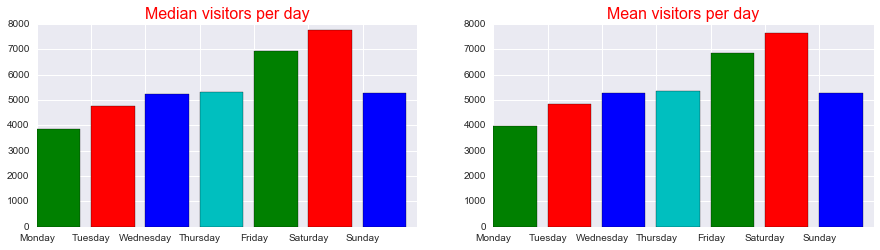

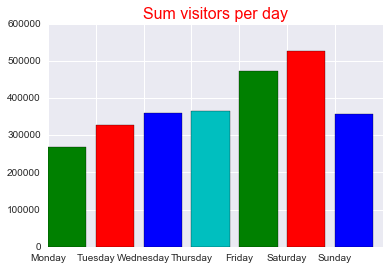

In [21]:
fn.stats_day(Totalvisitors_orgnal_stores)

In [22]:
# Totalvisitors_orgnal_stores.to_csv('Totalvisitors_orgnal_stores')
Totalvisitors_add_stores.to_csv('Totalvisitors_add_stores.csv')

mean1=71.510638, mean2=9.029661
variance1=777855.934715, variance2=1017442.445925
ADF Statistic: -6.463470
p-value: 0.000000
Critical Values:
	5%: -2.868
	1%: -3.445
	10%: -2.570
(array([155.82267467, 185.64071127, 191.13906697, 191.98909962,
       192.61604069, 194.23710105, 242.80968425, 266.63910263,
       276.7911041 , 278.08319366, 278.09525876, 278.8339776 ,
       284.06513203, 287.92036654, 289.52080365, 289.69147477,
       289.72534989, 289.74326284, 289.81644846, 289.81700134,
       289.82769831, 290.01043217, 291.205417  , 292.72175267,
       294.72371495, 297.00127593, 298.45201477, 299.05735213,
       299.08171531, 300.84499101, 303.29335526, 305.69025123,
       311.02094432, 318.0381057 , 320.42980857, 321.92531172,
       322.79378042, 322.7963294 , 323.31650782, 325.99438667]), array([9.25586704e-36, 4.88238182e-41, 3.46376430e-41, 1.98081564e-40,
       1.07785936e-39, 3.19496994e-39, 9.38689086e-49, 5.08620133e-53,
       2.16222485e-54, 6.60621707e-54, 3.56403

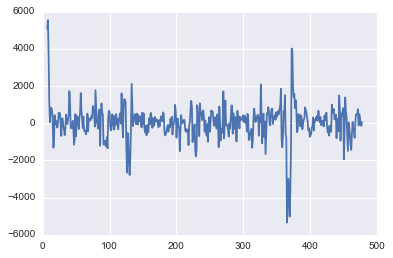

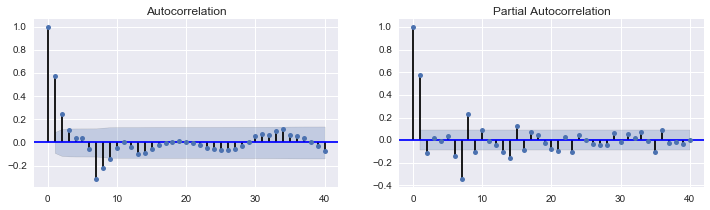

In [23]:
TV_orgnal_stores_diff7 = (Totalvisitors_orgnal_stores.visitors-Totalvisitors_orgnal_stores.visitors.shift(7)).dropna()
plt.plot(TV_orgnal_stores_diff7)

fn.ACF(TV_orgnal_stores_diff7)
fn.ADF(TV_orgnal_stores_diff7)
fn.Box(TV_orgnal_stores_diff7)

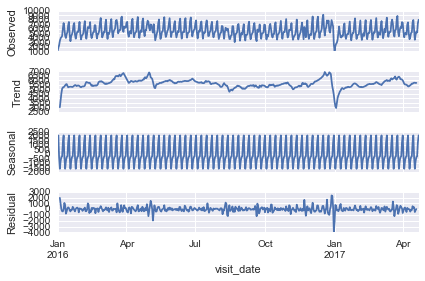

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
Totalvisitors_orgnal_stores.set_index('visit_date', inplace=True)
decomposition = seasonal_decompose(Totalvisitors_orgnal_stores.visitors,  model='additive')
decomposition.plot()
plt.show()

In [25]:
signal.periodogram(Totalvisitors_orgnal_stores.visitors)


(array([0.        , 0.00209205, 0.0041841 , 0.00627615, 0.0083682 ,
        0.01046025, 0.0125523 , 0.01464435, 0.0167364 , 0.01882845,
        0.0209205 , 0.02301255, 0.0251046 , 0.02719665, 0.0292887 ,
        0.03138075, 0.0334728 , 0.03556485, 0.0376569 , 0.03974895,
        0.041841  , 0.04393305, 0.0460251 , 0.04811715, 0.05020921,
        0.05230126, 0.05439331, 0.05648536, 0.05857741, 0.06066946,
        0.06276151, 0.06485356, 0.06694561, 0.06903766, 0.07112971,
        0.07322176, 0.07531381, 0.07740586, 0.07949791, 0.08158996,
        0.08368201, 0.08577406, 0.08786611, 0.08995816, 0.09205021,
        0.09414226, 0.09623431, 0.09832636, 0.10041841, 0.10251046,
        0.10460251, 0.10669456, 0.10878661, 0.11087866, 0.11297071,
        0.11506276, 0.11715481, 0.11924686, 0.12133891, 0.12343096,
        0.12552301, 0.12761506, 0.12970711, 0.13179916, 0.13389121,
        0.13598326, 0.13807531, 0.14016736, 0.14225941, 0.14435146,
        0.14644351, 0.14853556, 0.15062762, 0.15

(-0.02, 0.02)

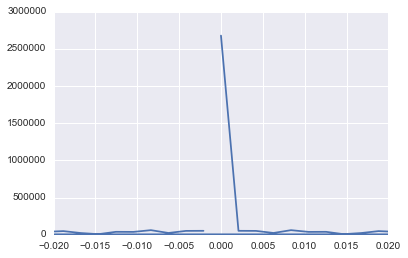

In [27]:
from numpy import fft
x = Totalvisitors_orgnal_stores.visitors
spectrum = fft.fft(Totalvisitors_orgnal_stores.visitors)
freq = fft.fftfreq(len(spectrum))
plt.plot(freq, abs(spectrum))
plt.xlim(-.02, .02)


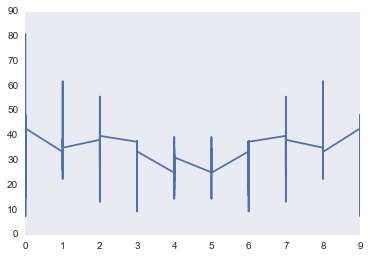

In [28]:
N = x.size
X_db = 20*np.log10(2*np.abs(spectrum)/N)
Fs =  10
f = np.arange(0, N)*Fs/N
plt.plot(f, X_db)
plt.grid()
plt.show()

In [29]:
threshold = 0.5 * max(abs(spectrum))
mask = abs(spectrum) > threshold
peaks = freq[mask]

mean1=24.142857, mean2=5.246862
variance1=1848098.798071, variance2=2154778.396786
ADF Statistic: -7.582818
p-value: 0.000000
Critical Values:
	5%: -2.868
	1%: -3.445
	10%: -2.570


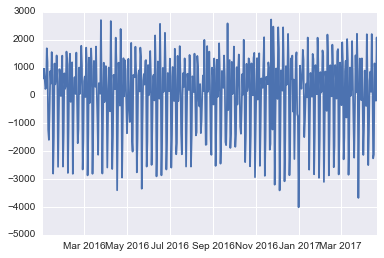

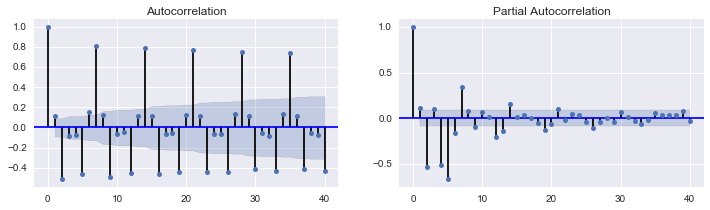

In [30]:
TV_orgnal_stores_diff1 = (Totalvisitors_orgnal_stores.visitors-Totalvisitors_orgnal_stores.visitors.shift(1)).dropna()
plt.plot(TV_orgnal_stores_diff1)

fn.ACF(TV_orgnal_stores_diff1)
fn.ADF(TV_orgnal_stores_diff1)

mean1=46.571429, mean2=5.953782
variance1=4188586.026522, variance2=4759558.246800
ADF Statistic: -7.951492
p-value: 0.000000
Critical Values:
	5%: -2.868
	1%: -3.445
	10%: -2.570


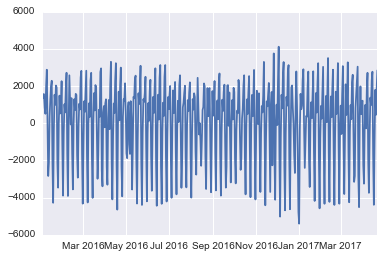

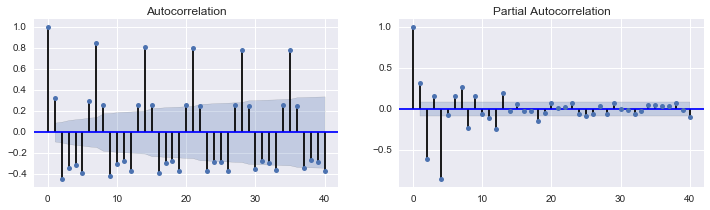

In [31]:
TV_orgnal_stores_diff2 = (Totalvisitors_orgnal_stores.visitors-Totalvisitors_orgnal_stores.visitors.shift(2)).dropna()
plt.plot(TV_orgnal_stores_diff2)

fn.ACF(TV_orgnal_stores_diff2)
fn.ADF(TV_orgnal_stores_diff2)

In [32]:
# df10 = [[]]
# df10['t'] = Totalvisitors_orgnal_stores['visitors']
# df10['t7'] = Totalvisitors_orgnal_stores.visitors.shift(7)
# df10
Totalvisitors_orgnal_stores['t7'] = Totalvisitors_orgnal_stores.visitors.shift(7)
Totalvisitors_orgnal_stores.dropna()
Totalvisitors_orgnal_stores.dropna().corr(method='pearson')

,visitors,t7
visitors,1.000000,0.765335
t7,0.765335,1.000000


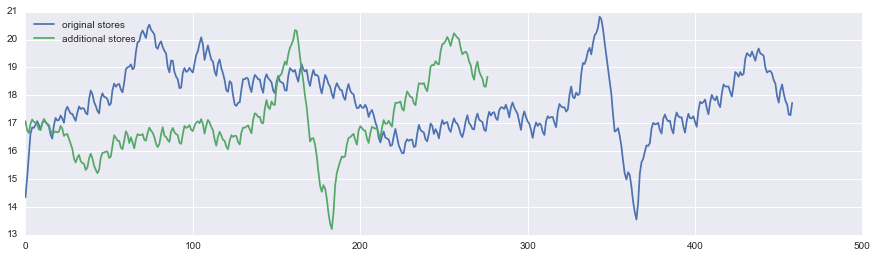

In [33]:
window = 20
mavg_vstors_orgnal_stors = fn.mavg(window, Totalvisitors_orgnal_stores.visitors/float(len(original_stores)))
mavg_vstors_add_stors = fn.mavg(window, Totalvisitors_add_stores.visitors/float(len(additional_stores)))

fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(mavg_vstors_orgnal_stors, label = 'original stores')
ax.plot(mavg_vstors_add_stors, label = 'additional stores')
# plt.title('Total visitors per restaurant')   
legend = ax.legend(loc = 'upper left', shadow = True)
# plt.xlabel('visit_date')
# plt.xlim('2016-01-01', '2017-05-05')
# plt.ylabel('Visitors/Restaurant')
# # plt.gca().xaxis.set_major_locator(months)
# plt.gcf().autofmt_xdate(rotation=30)

plt.show()

### Analysing air_reserve Data

In [34]:
Total_resvisitors_day = air_reserve.groupby\
([air_reserve['visit_datetime'].dt.date])['reserve_visitors'].sum()

# Totalvisitors_day
# start = time()
# df2 = dfwithIndex.groupby('visit_date', as_index=False).sum()
# end = time()
# print end - start

# fig, ax = plt.subplots(figsize=(15, 4))
# ax.plot(Totalvisitors_day.visit_date, Totalvisitors_day.visitors, \
#         label = 'air_visit')
# ax.plot(Total_resvisitors_day.index, Total_resvisitors_day, label = \
#         'air_reserve')
# legend = ax.legend(loc = 'upper left', shadow = True)
# plt.xlabel('visit_date')
# plt.ylabel('Total Visitors')
# plt.gcf().autofmt_xdate(rotation=30)
# plt.show()

# fig, ax = plt.subplots(figsize=(15, 4))
# ax.plot(Totalvisitors_day.visit_date, Totalvisitors_day.visitors, \
#         label = 'air_visit')
# ax.plot(Total_resvisitors_day.index, Total_resvisitors_day, \
#         label = 'air_reserve')
# legend = ax.legend(loc = 'upper left')
# plt.xlabel('visit_date')
# plt.ylabel('Total Visitors')
# plt.xlim('2016-04-22', '2016-06-30')
# plt.ylim(0, 10000)
# plt.gcf().autofmt_xdate(rotation=30)
# plt.show()
# print min(Totalvisitors_day.visit_date), max(Totalvisitors_day.visit_date)

# print Total_resvisitors_day.index.dtype
# print type(Total_resvisitors_day)

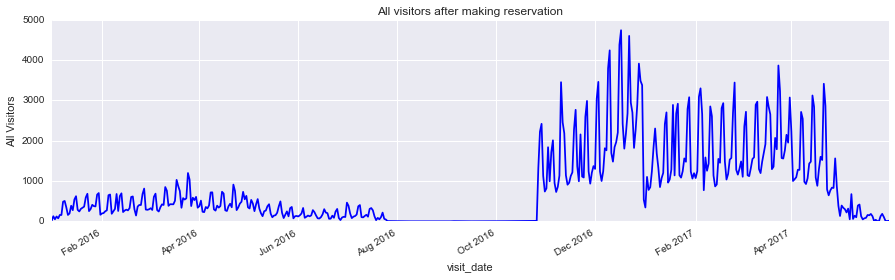

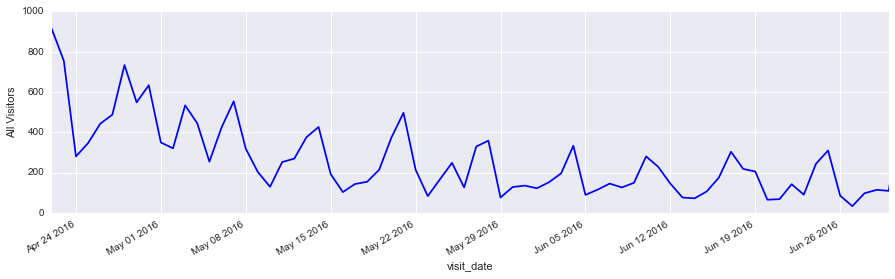

In [35]:
fig = plt.figure(figsize=(15, 4))
plt.plot(Total_resvisitors_day.index, Total_resvisitors_day, color='blue')
plt.xlabel('visit_date')
plt.ylabel('All Visitors')
plt.title('All visitors after making reservation')
# plt.gca().xaxis.set_major_locator(months)
plt.gcf().autofmt_xdate(rotation=30)
plt.show()

fig = plt.figure(figsize=(15, 4))
plt.plot(Total_resvisitors_day.index, Total_resvisitors_day, color = 'blue')
plt.xlabel('visit_date')
plt.ylabel('All Visitors')
plt.xlim('2016-04-22', '2016-06-30')
plt.ylim(0, 1000)
plt.gcf().autofmt_xdate(rotation=30)


In [36]:
# print type(air_reserve['visit_datetime'].dt.time)
air_reserve['reservation_inadvance'] = \
air_reserve['visit_datetime'].subtract(air_reserve['reserve_datetime'])

air_reserve['reservation_time'] = \
(air_reserve['reservation_inadvance'].dt.components.days)*24+ \
(air_reserve['reservation_inadvance'].dt.components.hours)

In [37]:
Total_resvisitors_hour = air_reserve.groupby\
([air_reserve['visit_datetime'].dt.time])['reserve_visitors'].sum()

reservationTOvisit_time = air_reserve.groupby('reservation_time', \
                         as_index=False)['reserve_visitors'].sum()
# reservationTOvisit_time
# air_reserve

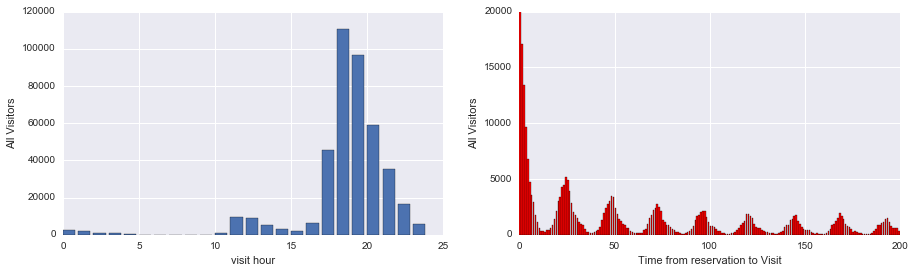

In [38]:
Total_resvisitors_hour = Total_resvisitors_hour.reset_index(drop=True)
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
plt.bar(Total_resvisitors_hour.index, Total_resvisitors_hour)
plt.xlabel('visit hour')
plt.ylabel('All Visitors')
plt.autoscale()
# plt.gcf().autofmt_xtime(rotation=30)

fig.add_subplot(1, 2, 2)
plt.bar(reservationTOvisit_time.reservation_time, \
        reservationTOvisit_time.reserve_visitors, color = 'red')
plt.xlabel('Time from reservation to Visit')
plt.ylabel('All Visitors')
plt.xlim(0,200)
plt.ylim(0,20000)
plt.show()

#### Reservation vs Visit

['air_store_id', 'visit_date', 'visitors', 'day_of_week', 'month', 'year']
['air_store_id', 'visit_datetime', 'reserve_datetime', 'reserve_visitors', 'reservation_inadvance', 'reservation_time']


/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


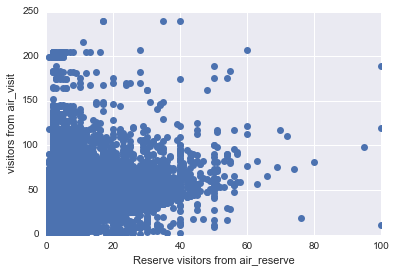

In [39]:
print list(air_visit)
print list(air_reserve)
df1 = air_visit.iloc[:,[0,1,2]]
df2 = air_reserve.iloc[:,[0,3]]

# air_visit.iloc[:,[0,1,2]].merge( \
# air_reserve.rename(columns={'visit_datetime':'visit_date'}).iloc[:,[0,1,3]], \
#                            on = ['air_store_id', 'visit_date'], how='left')
# air_visit.iloc[:,[0,1]]
# pd.DatetimeIndex(df2.visit_date).normalize()
df2['visit_date'] = pd.DatetimeIndex(air_reserve.visit_datetime).normalize()
df3 = df1.merge(df2, on = ['air_store_id', 'visit_date'])

plt.plot(df3.reserve_visitors, df3.visitors, 'o')
plt.ylabel('visitors from air_visit')
plt.xlabel('Reserve visitors from air_reserve')

In [40]:
# df11 = df1.set_index(['air_store_id', 'visit_date'])
# df21 = df2.set_index(['air_store_id', 'visit_date'])
# df11.join(df21)

In [41]:
list(df1), list(df2), list(df3)

(['air_store_id', 'visit_date', 'visitors'],
 ['air_store_id', 'reserve_visitors', 'visit_date'],
 ['air_store_id', 'visit_date', 'visitors', 'reserve_visitors'])

### air_store_info data

In [42]:
latitude_longitude = air_store.groupby(['latitude', 'longitude'], \
                                      as_index=False)['air_store_id'].count()
print type(latitude_longitude)
latitude_longitude
cuisine_type = air_store.groupby('air_genre_name', as_index=False) \
                                ['air_store_id'].count()
# cuisine_type.sort('air_store_id', ascending=False)
cuisine_type.sort_values(by='air_store_id', ascending=False, inplace=True)

area_name = air_store.groupby('air_area_name', as_index=False) \
                                ['air_store_id'].count()
area_name.sort_values(by='air_store_id', ascending=False, inplace=True)

<class 'pandas.core.frame.DataFrame'>


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102]


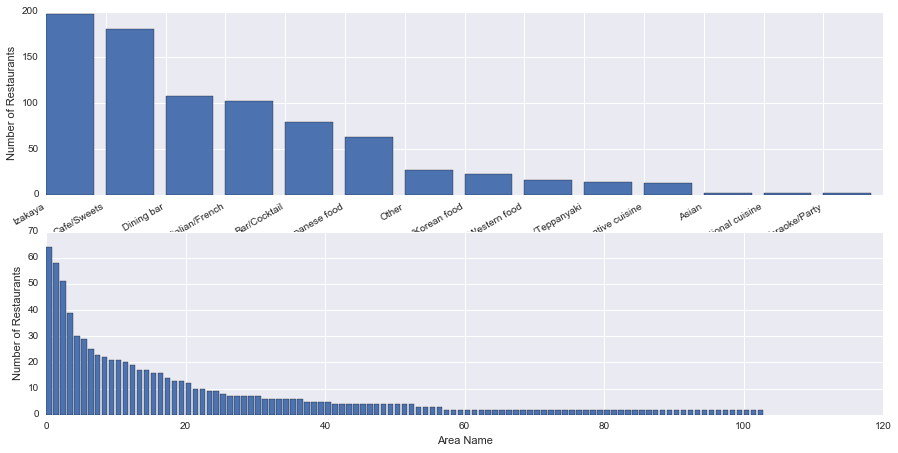

In [43]:
fig = plt.figure(figsize=(15, 8))
fig.add_subplot(2, 1, 1)

cuisines = [i for i in range(0, len(cuisine_type))]
plt.bar(cuisines, cuisine_type.air_store_id)
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Restaurants')
plt.xticks(cuisines, cuisine_type.air_genre_name)
plt.gcf().autofmt_xdate(rotation=30)

fig.add_subplot(2, 1, 2)
areas = [i for i in range(0, len(area_name))]
print areas
plt.bar(areas, area_name.air_store_id)
plt.xlabel('Area Name')
plt.ylabel('Number of Restaurants')
# plt.xticks(areas, area_name.air_area_name)
# plt.gcf().autofmt_xdate(rotation=30)

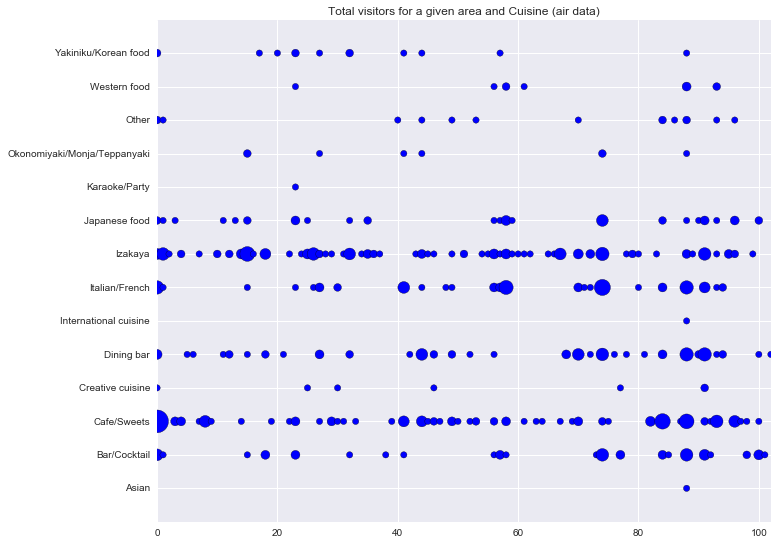

4       9
10      2
35      2
51      2
60      2
64      4
73      3
92      7
99      2
111     2
114     2
128     4
133     4
139    10
160     4
163     2
165     2
171    13
182     2
190     4
201     9
215     6
222     2
228     3
Name: air_store_id, dtype: int64


2     11
4      5
9      2
3      2
13     1
10     1
7      1
6      1
Name: air_store_id, dtype: int64

In [44]:
df = air_store.groupby(['air_area_name', 'air_genre_name'], as_index=False)['air_store_id'].count()

x = df.iloc[:,0]
uniques_x, X = np.unique(x, return_inverse=True)

y = df.iloc[:,1]
uniques_y, Y = np.unique(y, return_inverse=True)

# x = [0,2,4,6,8,10]
# y = [0]*len(x)
plt.rc('font', **{'sans-serif' : 'Arial',
                           'family' : 'sans-serif'})

fig = plt.figure(figsize=(11, 9))
s = df.iloc[:,2].values*20

plt.scatter(X,Y,s=s)
# plt.xticks(X, uniques_x)
plt.xlim(0, 102)
plt.yticks(np.arange(min(Y), max(Y)+1, 1.0), uniques_y)
plt.ylim(-1, 14)
plt.title('Total visitors for a given area and Cuisine (air data)')
plt.show()
lst = df[df['air_genre_name'] == 'Italian/French'].iloc[:,2]
print lst
lst.value_counts()

### hpg reserve data

In [45]:
hpg_reserve['reservation_inadvance'] = \
hpg_reserve['visit_datetime'].subtract(hpg_reserve['reserve_datetime'])

hpg_reserve['reservation_time'] = \
(hpg_reserve['reservation_inadvance'].dt.components.days)*24+ \
(hpg_reserve['reservation_inadvance'].dt.components.hours)

In [46]:
# hpg_reserve

In [47]:
Total_hpgres_visitors_hour = hpg_reserve.groupby\
([hpg_reserve['visit_datetime'].dt.time])['reserve_visitors'].sum()

hpg_reservationTOvisit_time = hpg_reserve.groupby('reservation_time', \
                         as_index=False)['reserve_visitors'].sum()
# hpg_reservationTOvisit_time

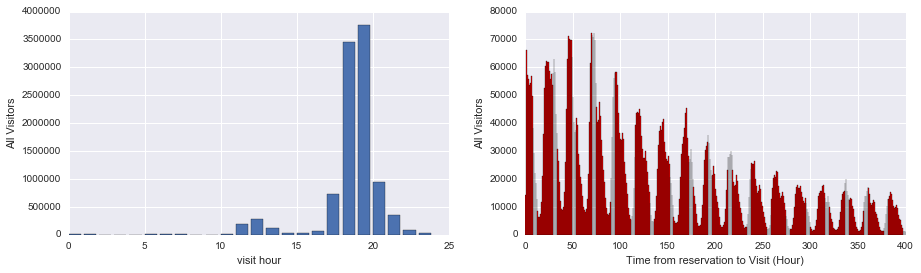

In [48]:
Total_hpgres_visitors_hour = Total_hpgres_visitors_hour.reset_index(drop=True)
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
plt.bar(Total_hpgres_visitors_hour.index, Total_hpgres_visitors_hour)
plt.xlabel('visit hour')
plt.ylabel('All Visitors')
plt.autoscale()
# plt.gcf().autofmt_xtime(rotation=30)

fig.add_subplot(1, 2, 2)
plt.bar(hpg_reservationTOvisit_time.reservation_time, \
        hpg_reservationTOvisit_time.reserve_visitors, color = 'red')
plt.xlabel('Time from reservation to Visit (Hour)')
plt.ylabel('All Visitors')
plt.xlim(0,400)
plt.ylim(0,80000)
plt.show()

## hpg_store_info

In [49]:
latitude_longitude = hpg_store.groupby(['latitude', 'longitude'], \
                                      as_index=False)['hpg_store_id'].count()
print type(latitude_longitude)
latitude_longitude
cuisine_type = hpg_store.groupby('hpg_genre_name', as_index=False) \
                                ['hpg_store_id'].count()
# cuisine_type.sort('air_store_id', ascending=False)
cuisine_type.sort_values(by='hpg_store_id', ascending=False, inplace=True)

area_name = hpg_store.groupby('hpg_area_name', as_index=False) \
                                ['hpg_store_id'].count()
area_name.sort_values(by='hpg_store_id', ascending=False, inplace=True)
# latitude_longitude

<class 'pandas.core.frame.DataFrame'>


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118]


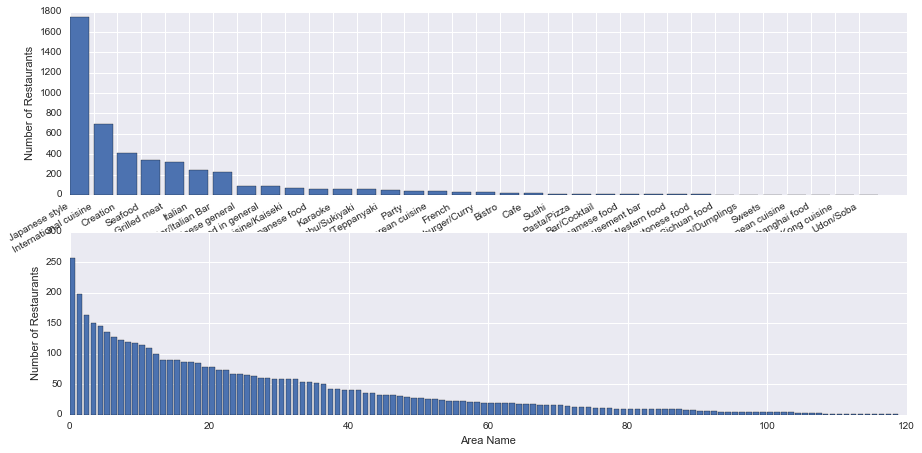

In [50]:
fig = plt.figure(figsize=(15, 8))
fig.add_subplot(2, 1, 1)

cuisines = [i for i in range(0, len(cuisine_type))]
plt.bar(cuisines, cuisine_type.hpg_store_id)
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Restaurants')
plt.xticks(cuisines, cuisine_type.hpg_genre_name)
plt.gcf().autofmt_xdate(rotation=30)

fig.add_subplot(2, 1, 2)
areas = [i for i in range(0, len(area_name))]
print areas
plt.bar(areas, area_name.hpg_store_id)
plt.xlabel('Area Name')
plt.ylabel('Number of Restaurants')
# plt.xticks(areas, area_name.air_area_name)
# plt.gcf().autofmt_xdate(rotation=30)

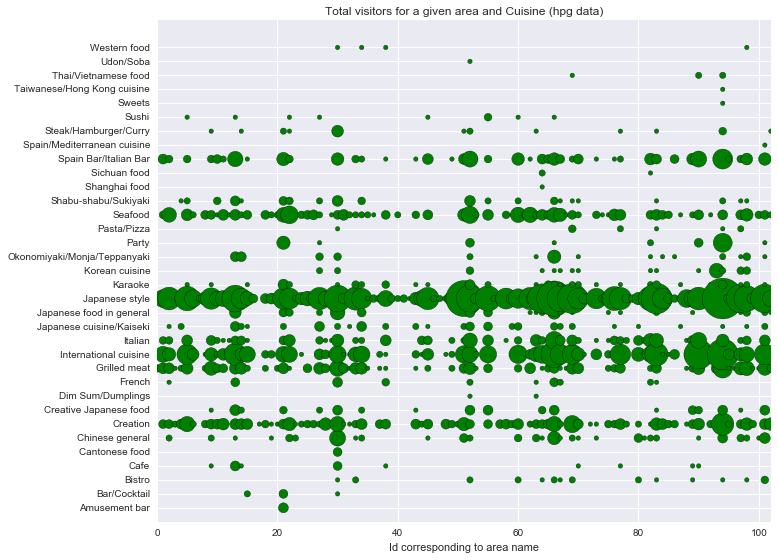

In [51]:
df = hpg_store.groupby(['hpg_area_name', 'hpg_genre_name'], as_index=False)['hpg_store_id'].count()

x = df.iloc[:,0]
uniques_x, X = np.unique(x, return_inverse=True)

y = df.iloc[:,1]
uniques_y, Y = np.unique(y, return_inverse=True)

# x = [0,2,4,6,8,10]
# y = [0]*len(x)
plt.rc('font', **{'sans-serif' : 'Arial',
                           'family' : 'sans-serif'})

fig = plt.figure(figsize=(11, 9))
s = df.iloc[:,2].values*20

plt.scatter(X,Y,s=s, c='g')
# plt.xticks(X, uniques_x)
plt.xlim(0, 102)
plt.xlabel('Id corresponding to area name')
plt.yticks(np.arange(min(Y), max(Y)+1, 1.0), uniques_y)
plt.ylim(-1, 35)
plt.title('Total visitors for a given area and Cuisine (hpg data)')
plt.show()

In [52]:
store_id_relation = pd.read_csv('store_id_relation.csv')
# store_id_relation

#### Holiday Info

In [53]:

date_info['calendar_date'] = pd.to_datetime(date_info['calendar_date'])
date_info['day_of_week'] = date_info['day_of_week'].astype('category')
# date_info['holiday_flg'] = date_info['holiday_flg'].astype('category')
date_info
# min(date_info['calendar_date'])
date_info.dtypes

calendar_date    datetime64[ns]
day_of_week            category
holiday_flg               int64
dtype: object

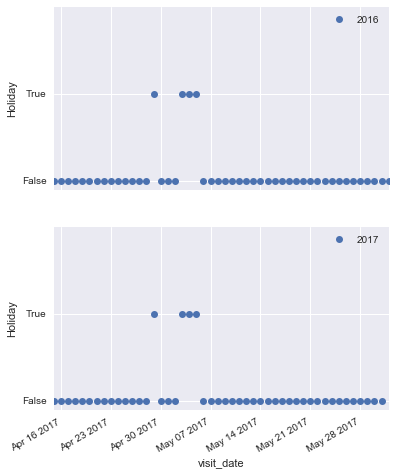

In [54]:
status = ['False', 'True']
a = [0, 1]
fig = plt.figure(figsize=(6, 8))
fig.add_subplot(2,1,1)
plt.plot(date_info.calendar_date, date_info.holiday_flg, 'o', label = '2016')
plt.xlabel('visit_date')
plt.ylabel('Holiday')
plt.xlim('2016-04-15', '2016-06-01')
plt.ylim(-.1, 2)
plt.yticks(a, status)
plt.legend()
plt.gcf().autofmt_xdate(rotation=30)

fig.add_subplot(2,1,2)
plt.plot(date_info.calendar_date, date_info.holiday_flg, 'o', label = '2017')
plt.xlabel('visit_date')
plt.ylabel('Holiday')
plt.xlim('2017-04-15', '2017-06-01')
plt.ylim(-.1, 2)
plt.yticks(a, status)
plt.legend()
plt.gcf().autofmt_xdate(rotation=30)

In [55]:
df1 = air_visit[0:3]
df2 = air_store[air_store['air_store_id'] == 'air_ba937bf13d40fb24']
df1.merge(df2[['air_store_id', 'air_genre_name']] , on = 'air_store_id', how= 'left')
df1
df2[['air_store_id', 'air_genre_name']]
# df1
# df2[['air_store_id', 'air_genre_name']]

,air_store_id,air_genre_name
112,air_ba937bf13d40fb24,Dining bar


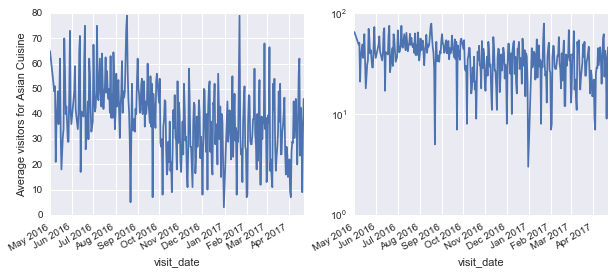

In [56]:
visitors_genre1 = air_visit.merge(air_store[['air_store_id', 'air_genre_name']], \
                on = 'air_store_id', how= 'left')
visitors_genre = visitors_genre1.groupby(['air_genre_name', 'visit_date'], as_index=False) \
                       ['visitors'].mean()
Totvstor_by_genre = visitors_genre1.groupby(['air_genre_name', 'visit_date'], as_index=False) \
                    ['visitors'].sum()

visitors_Asian = visitors_genre[visitors_genre['air_genre_name'] == 'Asian']

fig = plt.figure(figsize=(10, 4))
fig.add_subplot(1, 2, 1)
plt.plot(visitors_Asian.visit_date, visitors_Asian.visitors)
plt.xlabel('visit_date')
plt.ylabel('Average visitors for Asian Cuisine')
# plt.xlim('2016-04-15', '2016-06-01')
# plt.ylim(-.1, 2)
plt.gcf().autofmt_xdate(rotation=30)

fig.add_subplot(1,2,2)
plt.plot(visitors_Asian.visit_date, visitors_Asian.visitors)
plt.xlabel('visit_date')
# plt.xlim('2017-04-15', '2017-06-01')
# plt.ylim(-.1, 2)
# plt.yticks(a, status)
plt.yscale('log')
plt.gcf().autofmt_xdate(rotation=30)

In [57]:
len(visitors_genre.air_genre_name.unique())
# visitors_genre.visit_date.map()
df1 = visitors_genre.drop('visit_date', axis=1)
df1.columns = ['g', 'x']


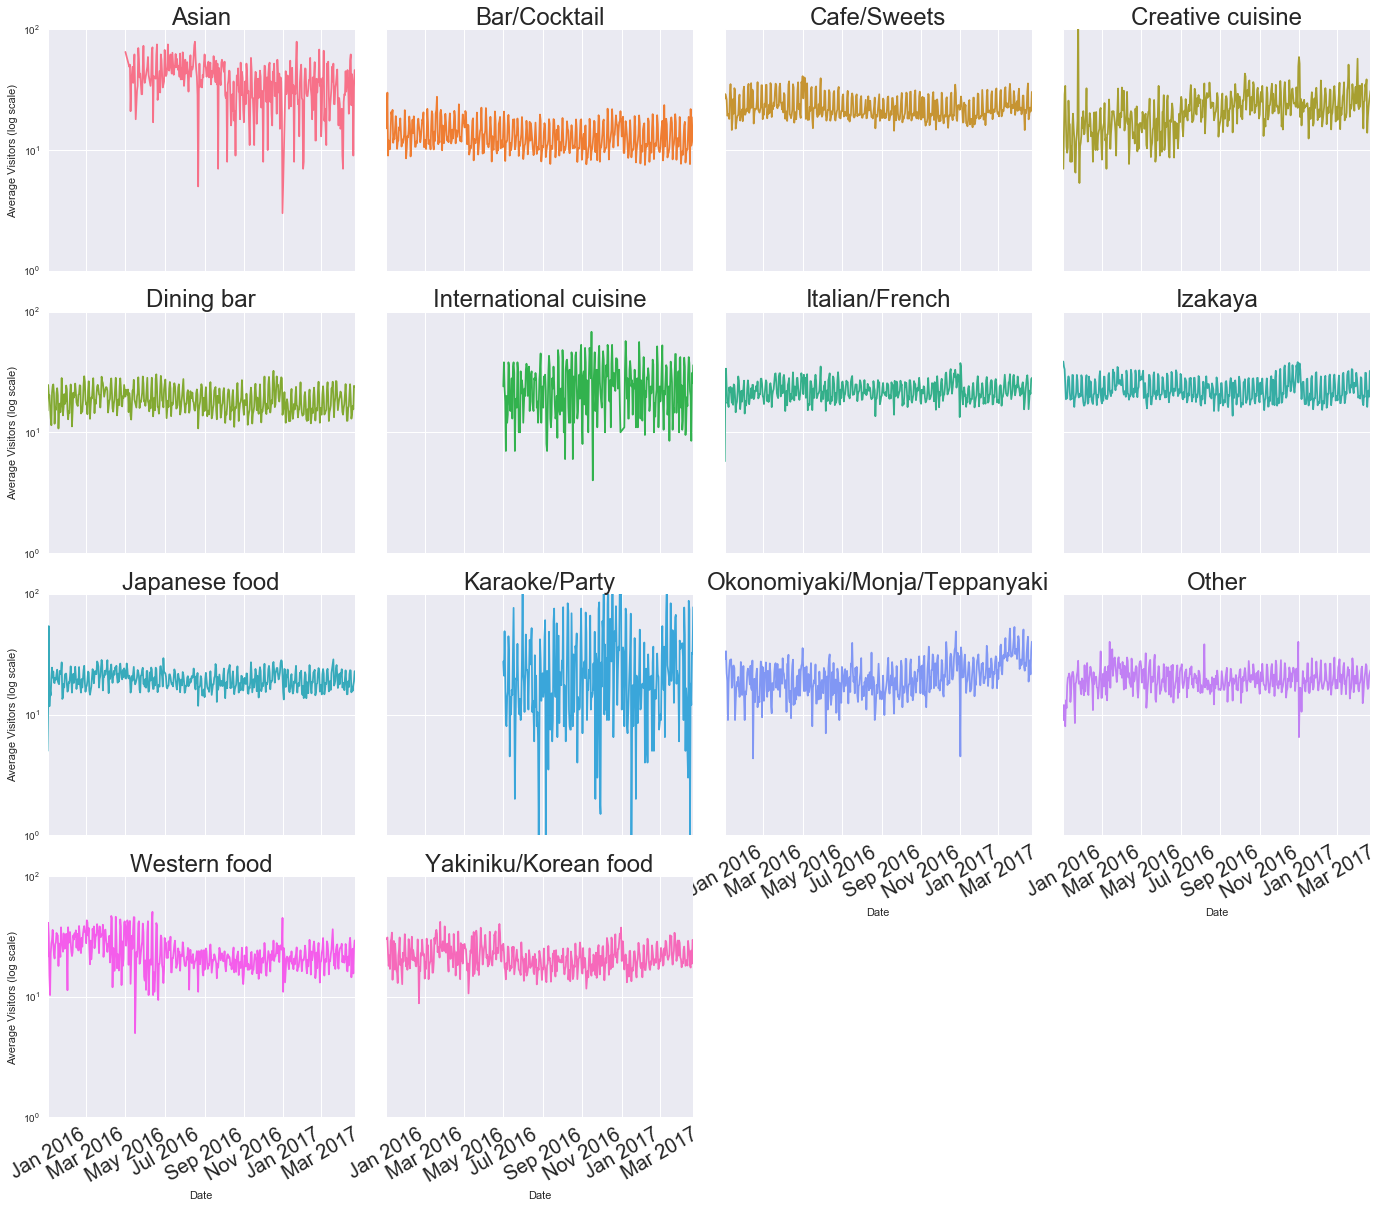

In [58]:
g = sns.FacetGrid(visitors_genre, col="air_genre_name", col_wrap=4, \
                 ylim = (1, 100), size=4, aspect=1.2, hue="air_genre_name")
# sns.set(font_scale=4)
g = g.map(plt.plot, "visit_date", "visitors")
g.set(yscale ='log')
g.set_titles(row_template = '{row_name}', col_template = '{col_name}', \
             size=24)
g.set_axis_labels('Date', 'Average Visitors (log scale)')
g.set_xticklabels(rotation=30, size =20)
# g.set_yticklabels(size =10)

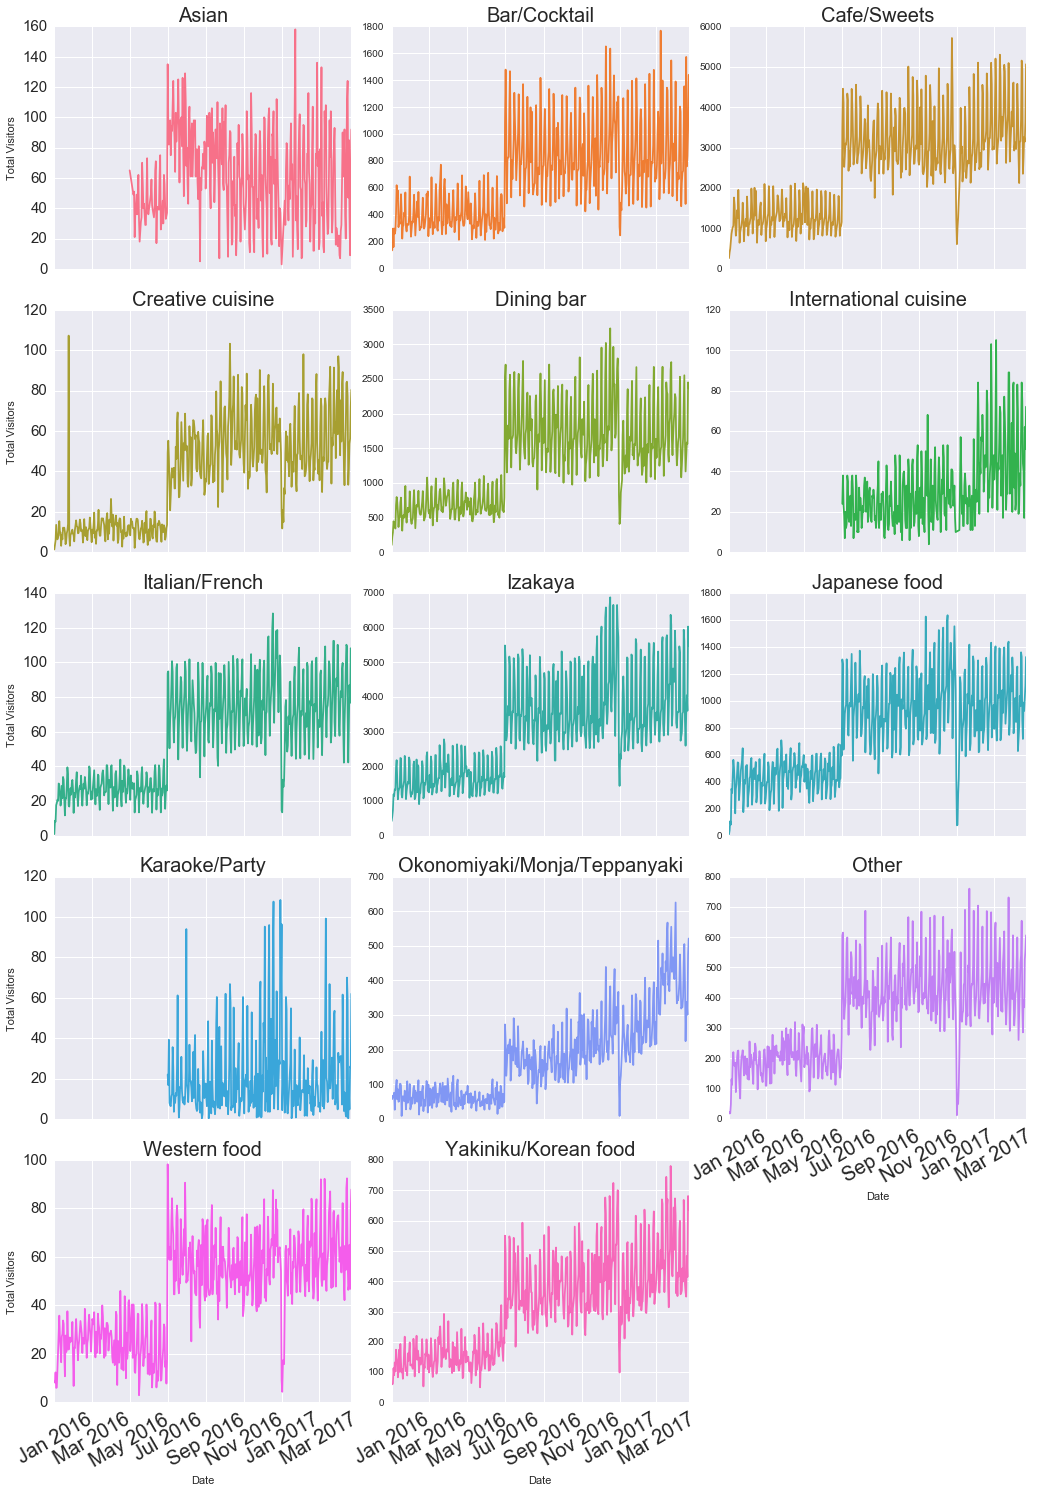

In [59]:
g = sns.FacetGrid(Totvstor_by_genre, col="air_genre_name", col_wrap=3, sharey=False,\
                  size=4, aspect=1.2, hue="air_genre_name")
g = g.map(plt.plot, "visit_date", "visitors")
g.set_titles(row_template = '{row_name}', col_template = '{col_name}', \
             size=20)
g.set_axis_labels('Date', 'Total Visitors')
g.set_xticklabels(rotation=30, size =20)
g.set_yticklabels(size =15)

In [60]:
air_store['air_area_name'] = air_store['air_area_name'].str.replace('ō','o').str.replace('Ō','O')
# air_store['area'] = air_store['area'].str.replace(u'ō','o').str.replace(u'Ō','O')

In [61]:
# visitors_area1 = air_visit.merge(air_store[['air_store_id', 'air_area_name']], \
#                 on = 'air_store_id', how= 'left')
# Totvstor_by_area = visitors_area1.groupby(['air_area_name', 'visit_date'], as_index=False) \
#                        ['visitors'].sum()

# y = Totvstor_by_area.iloc[:,0]
# uniques_y, Y = np.unique(y, return_inverse=True)
# uniques_y, Y

# Totvstor_by_area['areaid'] = Y

g = sns.FacetGrid(Totvstor_by_area, col="area", col_wrap=3, sharey=False,\
                  size=4, aspect=1.2, hue="area")
g = g.map(plt.plot, "visit_date", "visitors")
g.set_titles(row_template = '{row_name}', col_template = '{col_name}', \
             size=20)
g.set_axis_labels('Date', 'Total Visitors')
g.set_xticklabels(rotation=30, size =20)
g.set_yticklabels(size =15)

NameError: name 'Totvstor_by_area' is not defined

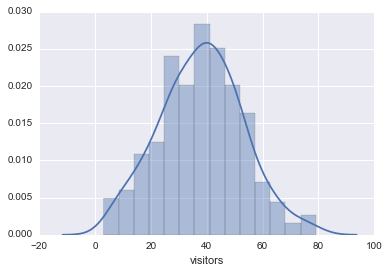

In [62]:
visitors_Asian
sns.distplot(visitors_Asian.visitors)

In [67]:
print list(air_visit)
print list(air_reserve)
print list(air_store)
print list(date_info)
print list(hpg_reserve)
print list(hpg_store)
print list(store_id_relation)
# air_reserve

['air_store_id', 'visit_date', 'visitors', 'day_of_week', 'month', 'year']
['air_store_id', 'visit_datetime', 'reserve_datetime', 'reserve_visitors', 'reservation_inadvance', 'reservation_time']
['air_store_id', 'air_genre_name', 'air_area_name', 'latitude', 'longitude']
['calendar_date', 'day_of_week', 'holiday_flg']
['hpg_store_id', 'visit_datetime', 'reserve_datetime', 'reserve_visitors', 'reservation_inadvance', 'reservation_time']
['hpg_store_id', 'hpg_genre_name', 'hpg_area_name', 'latitude', 'longitude']
['air_store_id', 'hpg_store_id']


                         g          x
0                    Asian  65.000000
1                    Asian  49.000000
2                    Asian  51.000000
3                    Asian  21.000000
4                    Asian  36.000000
5                    Asian  49.000000
6                    Asian  36.000000
7                    Asian  46.000000
8                    Asian  62.000000
9                    Asian  32.000000
10                   Asian  18.000000
11                   Asian  31.000000
12                   Asian  34.000000
13                   Asian  70.000000
14                   Asian  57.000000
15                   Asian  40.000000
16                   Asian  43.000000
17                   Asian  29.000000
18                   Asian  29.000000
19                   Asian  49.000000
20                   Asian  73.000000
21                   Asian  41.000000
22                   Asian  36.000000
23                   Asian  49.000000
24                   Asian  59.000000
25          

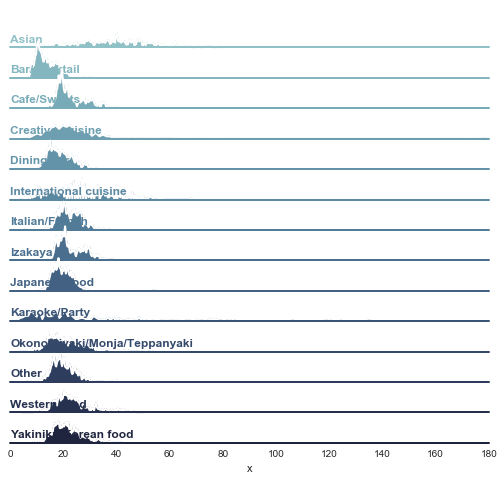

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(700)
# print len(x)
# g = np.tile(list("ABCDEFGHIJKLMN"), 50)
g = np.tile(visitors_genre.air_genre_name.unique(), 50)
# print g
df = visitors_genre.drop('visit_date', axis=1)
df.columns = ['g', 'x']
print df
# m = df.g.map(ord)

# df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(14, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, size=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)


### The holiday impact

['calendar_date', 'day_of_week', 'holiday_flg']


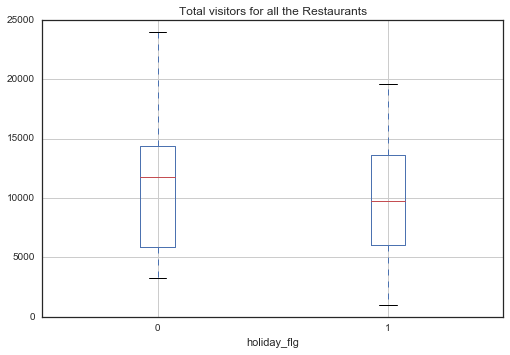

['calendar_date', 'visitors']
['calendar_date', 'visitors']


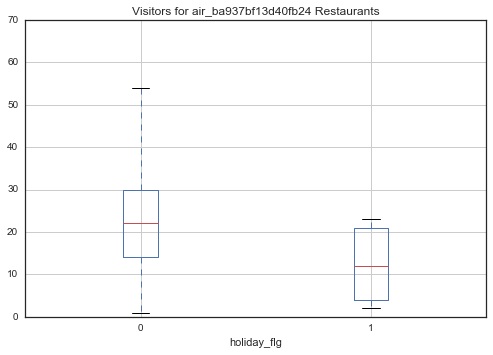

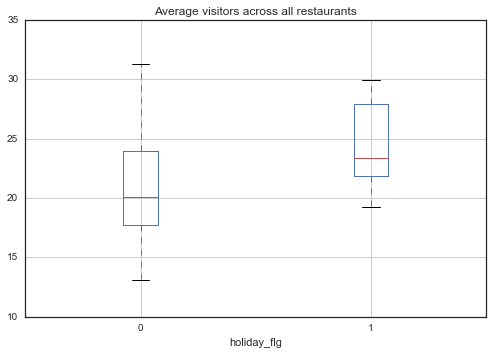

In [65]:
print list(date_info)


date_info
a1 = air_visit.groupby('visit_date', as_index=False)['visitors'].sum()
a1.rename(columns={'visit_date': 'calendar_date'}, inplace=True)
allvisitors_holiday = date_info.merge(a1, on='calendar_date', how='left')
allvisitors_holiday.dropna(inplace=True)
allslice = allvisitors_holiday.iloc[:, [2,3]]
allslice.boxplot(column='visitors', by='holiday_flg')
plt.title('Total visitors for all the Restaurants')
plt.suptitle("")
plt.show()

b1 = air_visit[air_visit.air_store_id=='air_ba937bf13d40fb24'].iloc[:,[1,2]]
b1.rename(columns={'visit_date': 'calendar_date'}, inplace=True)
print list(a1)
print list(b1)
date_info
visitors_holiday = date_info.merge(b1, on='calendar_date', how='left')
visitors_holiday
store_slice = visitors_holiday.iloc[:, [2,3]]
store_slice.boxplot(column='visitors', by='holiday_flg')
plt.title('Visitors for air_ba937bf13d40fb24 Restaurants')
plt.suptitle("")
plt.show()

c1 = air_visit.groupby('visit_date', as_index=False)['visitors'].mean()
c1.rename(columns={'visit_date': 'calendar_date'}, inplace=True)
allvisitors_holiday = date_info.merge(c1, on='calendar_date', how='left')
allvisitors_holiday.dropna(inplace=True)
allslice = allvisitors_holiday.iloc[:, [2,3]]

allslice.boxplot(column='visitors', by='holiday_flg')
plt.title('Average visitors across all restaurants')
plt.suptitle("")
plt.show()

In [66]:
data = allvisitors_holiday[allvisitors_holiday.holiday_flg == 1]
data['day_of_week'] = data['day_of_week'].astype("category", \
                                                  categories=days, ordered=True)
avgvstor_hol = data.groupby('day_of_week', as_index=False)['visitors'].mean()

data = allvisitors_holiday[allvisitors_holiday.holiday_flg == 0]
data['day_of_week'] = data['day_of_week'].astype("category", \
                                                  categories=days, ordered=True)
avgvstor_nonhol = data.groupby('day_of_week', as_index=False)['visitors'].mean()

plt.plot(weekdays, avgvstor_hol.visitors, 'ro', \
         weekdays, avgvstor_nonhol.visitors, 'bo')
plt.xticks(weekdays, avgvstor_nonhol.day_of_week)
plt.show()
avgvstor_nonhol

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(weekdays, avgvstor_hol.visitors, 'ro', markersize=25, label = 'holidays')
ax.plot(weekdays, avgvstor_nonhol.visitors, 'bo', markersize=25, label = 'workdays')
legend = ax.legend(loc = 'lower right')


NameError: name 'days' is not defined

#### Reservations vs Visits

In [ ]:
x = [0,2,4,6,8,10]
y = [0]*len(x)
s = [20*2**n for n in range(len(x))]
plt.scatter(x,y,s=s)
plt.show()

In [ ]:
s = '(\xef\xbd\xa1\xef\xbd\xa5\xcf\x89\xef\xbd\xa5\xef\xbd\xa1)\xef\xbe\x89'
s1 = s.decode('utf-8')
print s1

In [ ]:
import unidecode
# air_store.iloc[:,2].values
s = 'Hy\xc5\x8dgo-ken K\xc5\x8dbe-shi Kumoid\xc5\x8dri'
s.decode('utf-8').split(' ')
# print s1
#air_store.iloc[:,2]

In [ ]:
s = 'Hy\xc5\x8dgo-ken K\xc5\x8dbe-shi Kumoid\xc5\x8dri'
s1 = s.decode('utf-8')
print s1

In [ ]:
air_store.iloc[:,2][0].decode('utf-8').split(' ')
# s1 = s.decode('utf-8')
# s1

In [ ]:
# for i in range(len(air_store.iloc[:,2])):
#     print air_store.iloc[:,2][i].split(' ')
#     print air_store.iloc[:,2][i].split(' ')
#     print [air_store.iloc[:,2][i].split(' ')[j].decode('utf-8') for j in range(3)]

In [ ]:
air_store["area"] = ""
# air_store

In [ ]:
for i in range(len(air_store.iloc[:,2])):
    air_store.iloc[:,5][i] = air_store.iloc[:,2][i].split(' ')[0].decode('utf-8')
#     print air_store.iloc[:,2][i].split(' ')
#     print [air_store.iloc[:,2][i].split(' ')[j].decode('utf-8') for j in range(3)]

In [ ]:
import re
def to_ascii(str):
    return re.sub(ur'[ō]',r'o',str)

In [ ]:
s = air_store.iloc[:,5].unique()[0]
s1 = to_ascii(s)
print s1
#s1 = s.decode('utf-8')
#s1, s, air_store.iloc[:,5].unique()[0].decode('utf-8')
# .decode('utf-8').strip()
# line.decode('utf-8').strip()

In [ ]:
y = Totvstor_by_area.iloc[[1, 500,-1]].iloc[:,0]
uniques_y, Y = np.unique(y, return_inverse=True)
for area, id1 in zip(uniques_y, Y):
    print area, id1

In [ ]:
x1 = 10*np.random.random(100)
x2 = 10*np.random.exponential(0.5, 100)
x3 = 10*np.random.normal(0, 0.4, 100)
type(x1)
# plt.boxplot ([x1, x2, x3])

In [ ]:
x = [0,2,4,6,8,10]
y = [0]*len(x)
s = [20*2**n for n in range(len(x))]
plt.scatter(x,y,s=s)
plt.show()

s = '(\xef\xbd\xa1\xef\xbd\xa5\xcf\x89\xef\xbd\xa5\xef\xbd\xa1)\xef\xbe\x89'
s1 = s.decode('utf-8')
print s1

import unidecode
# air_store.iloc[:,2].values
s = 'Hy\xc5\x8dgo-ken K\xc5\x8dbe-shi Kumoid\xc5\x8dri'
s.decode('utf-8').split(' ')
# print s1
#air_store.iloc[:,2]

s = 'Hy\xc5\x8dgo-ken K\xc5\x8dbe-shi Kumoid\xc5\x8dri'
s1 = s.decode('utf-8')
print s1

air_store.iloc[:,2][0].decode('utf-8').split(' ')
# s1 = s.decode('utf-8')
# s1

# for i in range(len(air_store.iloc[:,2])):
#     print air_store.iloc[:,2][i].split(' ')
#     print air_store.iloc[:,2][i].split(' ')
#     print [air_store.iloc[:,2][i].split(' ')[j].decode('utf-8') for j in range(3)]

air_store["area"] = ""
# air_store

for i in range(len(air_store.iloc[:,2])):
    air_store.iloc[:,5][i] = air_store.iloc[:,2][i].split(' ')[0].decode('utf-8')
#     print air_store.iloc[:,2][i].split(' ')
#     print [air_store.iloc[:,2][i].split(' ')[j].decode('utf-8') for j in range(3)]

import re
def to_ascii(str):
    return re.sub(ur'[ō]',r'o',str)

s = air_store.iloc[:,5].unique()[0]
s1 = to_ascii(s)
print s1
#s1 = s.decode('utf-8')
#s1, s, air_store.iloc[:,5].unique()[0].decode('utf-8')
# .decode('utf-8').strip()
# line.decode('utf-8').strip()

x1 = 10*np.random.random(100)
x2 = 10*np.random.exponential(0.5, 100)
x3 = 10*np.random.normal(0, 0.4, 100)
type(x1)
# plt.boxplot ([x1, x2, x3])